In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Identify price change rate of a stock

## download the stock data

In [2]:
!wget https://drive.google.com/uc?id=1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg -O stocks_1y.csv

--2023-09-15 09:49:01--  https://drive.google.com/uc?id=1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg
Resolving drive.google.com (drive.google.com)... 172.217.25.206
Connecting to drive.google.com (drive.google.com)|172.217.25.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vppab00da3tf0095tdnrvel39idbefvr/1694746125000/10800959494545164832/*/1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg?uuid=05f236fb-60e8-4697-a4dd-4ae323b85a6e [following]
--2023-09-15 09:49:01--  https://doc-0o-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vppab00da3tf0095tdnrvel39idbefvr/1694746125000/10800959494545164832/*/1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg?uuid=05f236fb-60e8-4697-a4dd-4ae323b85a6e
Resolving doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-docs.googleusercontent.com)... 172.217.26.65
Connecting to doc-0o-2o-docs.googleusercontent.com (doc-0o-2o-docs.googleuserconte

Total number of stock price in ONE year = 245


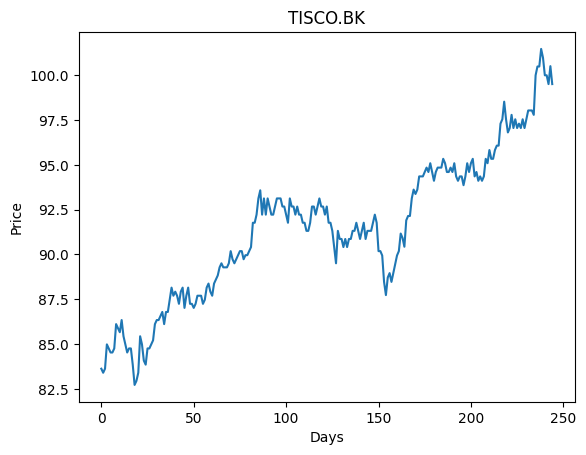

In [16]:
# YOUR INPUT PARAMETER - stock_no is based on the number 8th in your student ID
stock_no = 7

# Read and prepare the stock data, use this variable for 1.1-1.3
#       stock_data - 1-D numpy array of your assigned stock data
#       stock_name - the name of the stock
s = pd.read_csv("stocks_1y.csv")
stock_data = s.iloc[:,stock_no+1].to_numpy()
stock_name = s.columns.values[stock_no+1]
print("Total number of stock price in ONE year =",len(stock_data))

# 1.1 Plot the stock data
plt.plot(stock_data)
plt.title(stock_name)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

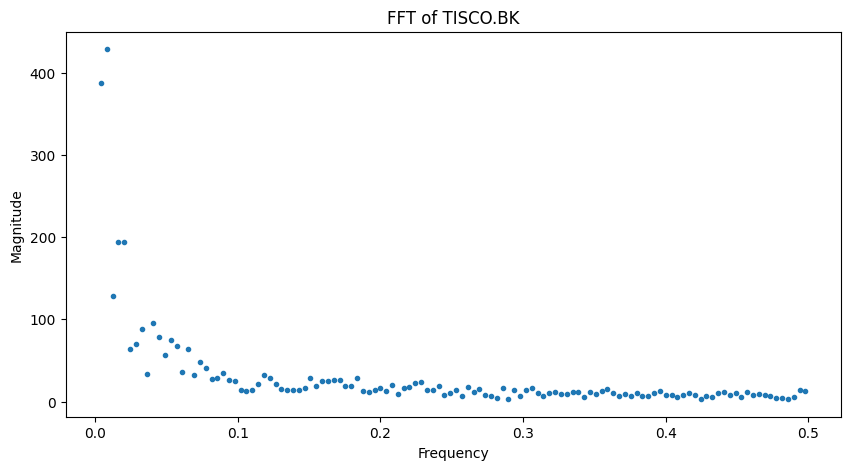

freq1 = 0.008163
freq2 = 0.004082
freq3 = 0.016327


In [83]:
# TO DO - visualization and find top three dominant frequencies
FFT_stock_data = np.fft.fft(stock_data)
magnitude = np.abs(FFT_stock_data)
freq = np.fft.fftfreq(len(stock_data))

# Remove the negative frequencies
magnitude = magnitude[freq>0]
freq = freq[freq>0]

# Plot the magnitude of the FFT of the stock data
plt.figure(figsize=(10,5))
plt.plot(freq, magnitude,'.')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("FFT of "+stock_name)
plt.show()

# Compute the dominant frequencies (6 floating points)
index = np.argsort(magnitude)
freq1 = freq[index[-1]]
freq2 = freq[index[-2]]
freq3 = freq[index[-3]]


print("freq1 =",round(freq1,6))
print("freq2 =",round(freq2,6))
print("freq3 =",round(freq3,6))

#2. Convolution in time domain vs. frequency domain
* Implement the convolution in time domain
* Implement the convolution using DFT
* Compare the computational time used for two methods

In [120]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Generate two random 4000-point sequences of x and h
N = 4000
x = np.random.rand(N)
h = np.random.rand(N)

# To calculate time elapsed for convolution process using start_time and end_time below
start_time = time.time()

# TO DO add convolution process in here
y1 = np.convolve(x,h, mode='full')

end_time = time.time()
# Compute the convolution time (6 floating points)
convolution_time = end_time - start_time
print("Computational Time for Convolution in Time Domain:", round(convolution_time,6), "seconds")

Computational Time for Convolution in Time Domain: 0.002011 seconds


In [122]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.signal as signal

# Generate two random 4000-point sequences of x and h
N = 4000
x = np.random.rand(N)
h = np.random.rand(N)

# To calculate time elapsed for convolution process using start_time and end_time below
start_time = time.time()

# TO DO add convolution process in here
y2 = signal.fftconvolve(x,h, mode='full')
# X = np.fft.fft(x, n=2*N-1)
# H = np.fft.fft(h, n=2*N-1)
# Y3 = np.multiply(X,H)
# y3 = np.abs(np.fft.ifft(Y3))

end_time = time.time()
# Compute the convolution time (6 floating points)
convolution_time = end_time - start_time
print("Computational Time for Convolution using FFT:", round(convolution_time,6), "seconds")

Computational Time for Convolution using FFT: 0.000996 seconds
